# Lab 1 Complex Network Analysis

In [1]:
from data import prepare_data
from synthetic_data import SyntheticGraphGenerator

import numpy as np

%config InlineBackend.figure_format = 'svg'

## Prepare real datasets and generate synthetic data

In [2]:
# Load `facebook graph` and `collaboration network`
real_graphs = prepare_data()

# Create synthetic networks
synthetic_graphs = {
    'random': SyntheticGraphGenerator.create_random_edge_graph(num_nodes=5000, edge_prob=0.001),
    'grid': SyntheticGraphGenerator.create_grid_graph(n=65, m=75),
    'kleinberg': SyntheticGraphGenerator.create_kleinberg_graph(n=65, m=75),
    'tree': SyntheticGraphGenerator.create_tree_graph(num_nodes=5000),
    'split': SyntheticGraphGenerator.create_split_graph(clique_size=250, stable_set_size=4750, prob=0.0001)
}

## Basic Algorithms
- The Depth-First Search and Breadth-First Search traversals
- Computation of the connected components
- Computation of the degree sequence
- Computation of the diameter
- Computation of the girth (minimum size of a cycle)

For demonstration, we will use the following smaller graph:

![Demo Graph](https://i.imgur.com/rmxHhLG.png)

In [3]:
from graph import Graph
import pprint


pp = pprint.PrettyPrinter(indent=4)

graph = Graph()
graph.nodes = set(range(7))
graph.adjacency_list = {
    0: [1],
    1: [0, 2, 3],
    2: [1, 4],
    3: [1, 5, 6],
    4: [2, 5],
    5: [3, 4, 6],
    6: [3, 5]
}

pp.pprint(graph.adjacency_list)

{   0: [1],
    1: [0, 2, 3],
    2: [1, 4],
    3: [1, 5, 6],
    4: [2, 5],
    5: [3, 4, 6],
    6: [3, 5]}


In [4]:
import basic_algorithms


_, out = basic_algorithms.depth_first_search(graph, next(iter(graph.nodes)))
print('DFS:', out, '\n')

_, out = basic_algorithms.breadth_first_search(graph, next(iter(graph.nodes)))
print('BFS:', out, '\n')

cc = basic_algorithms.get_connected_components(graph)
print('Connected components:')
pp.pprint(cc)
print()

degree_sequence = basic_algorithms.compute_degree_sequence(graph)
print('Degree sequence:')
pp.pprint(degree_sequence)
print()

diameter, src, dest = basic_algorithms.compute_diameter(graph)
print(f'Diameter: {diameter} between nodes {src} and {dest}.\n')

girth = basic_algorithms.compute_girth(graph)
print(f'Girth demo graph: {girth}.')

DFS: [0, 1, 2, 4, 5, 3, 6] 

BFS: [[0, 0], [1, 1], [2, 2], [3, 2], [4, 3], [5, 3], [6, 3]] 

Connected components:
[{0, 1, 2, 3, 4, 5, 6}]

Degree sequence:
{0: 1, 1: 3, 2: 2, 3: 3, 4: 2, 5: 3, 6: 2}

Diameter: 3 between nodes 4 and 0.

Girth demo graph: 3.


## Preliminary analysis

### Connected components size distribution
Compute the distribution size of the connected components for all real datasets and for the synthetic models. Compare the results graphically (i.e., make a plot). A graph has a big component if it has a connected components with at least n/100 vertices, and no other components larger than, say log(n)/2. Classify the graphs studied (real and synthetic) depending on whether they have a big component.

3000
11000


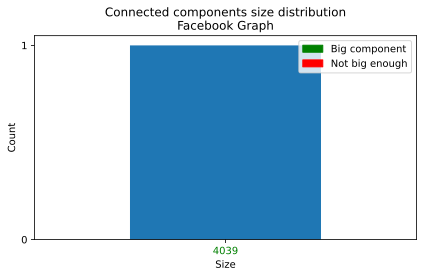

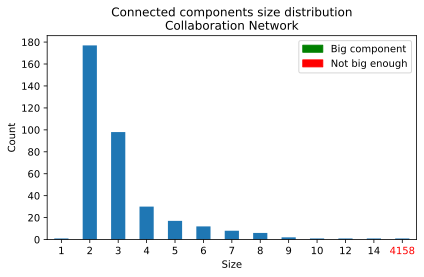

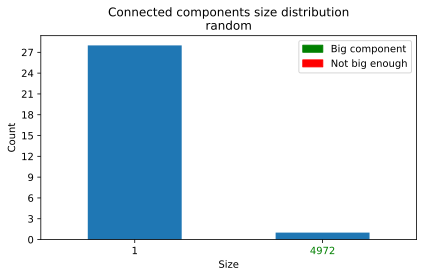

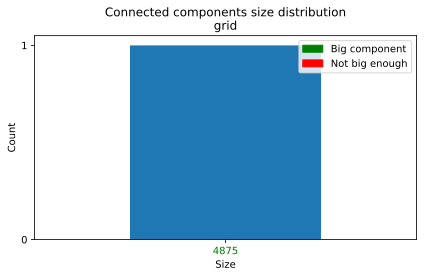

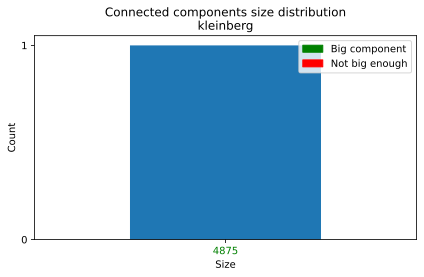

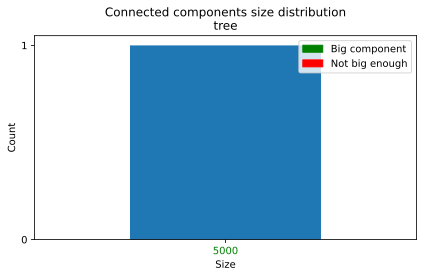

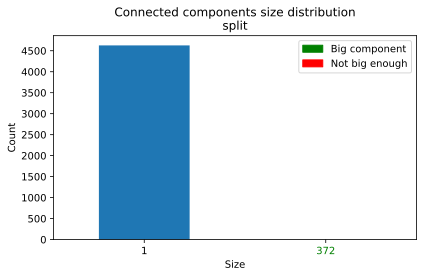

In [5]:
from analysis import distribution_of_connected_components


distribution_of_connected_components(graph=real_graphs['fb_graph'], name='Facebook Graph')
distribution_of_connected_components(graph=real_graphs['collaboration_network'], name='Collaboration Network')

for name, graph in synthetic_graphs.items():
    distribution_of_connected_components(graph=graph, name=name)

### Power-law exponenet estimation for degree distribution
A graph is scale-free if, for some constant c, the number of vertices of degree i grows proportionally to 1/i^c. You can check that graphicallyusing a log-scale.Classify the graphs studied depending whether they are scale-free or not (for those scale-free, also give an estimate of the constant c).

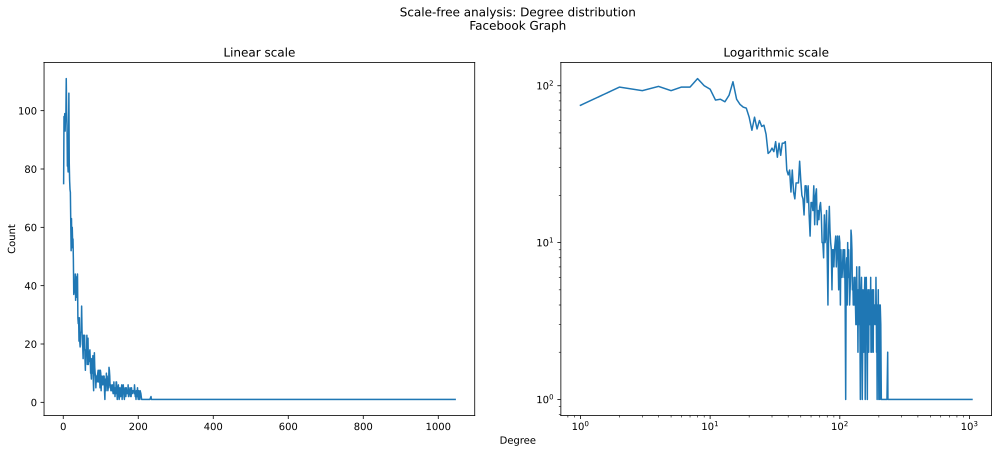

Facebook Graph: scale free ((False, 1.2587730752094903))


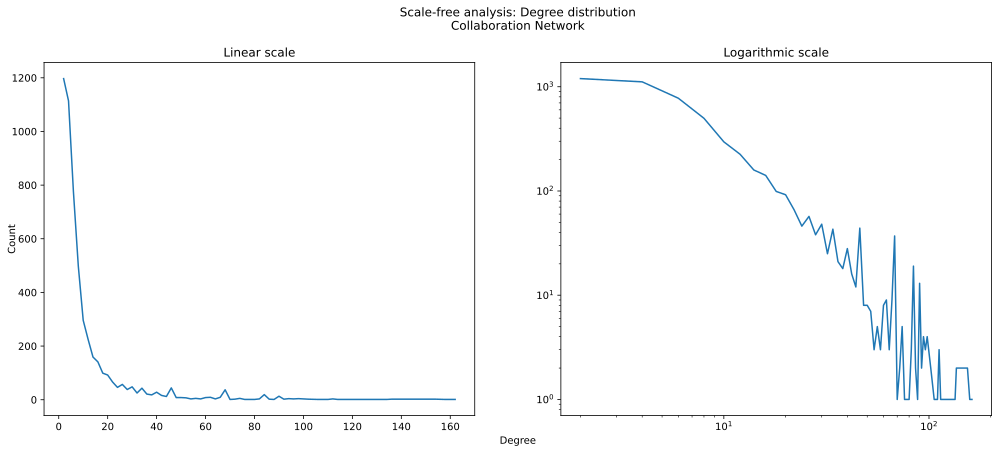

Collaboration Network: scale free ((False, 1.3907192999221227))


Values less than or equal to 0 in data. Throwing out 0 or negative values


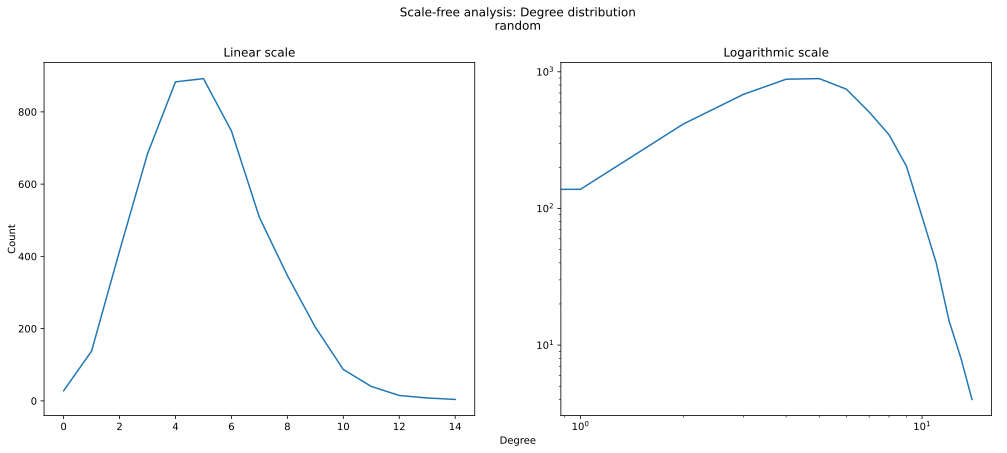

random: scale free ((False, 1.451732736359856))


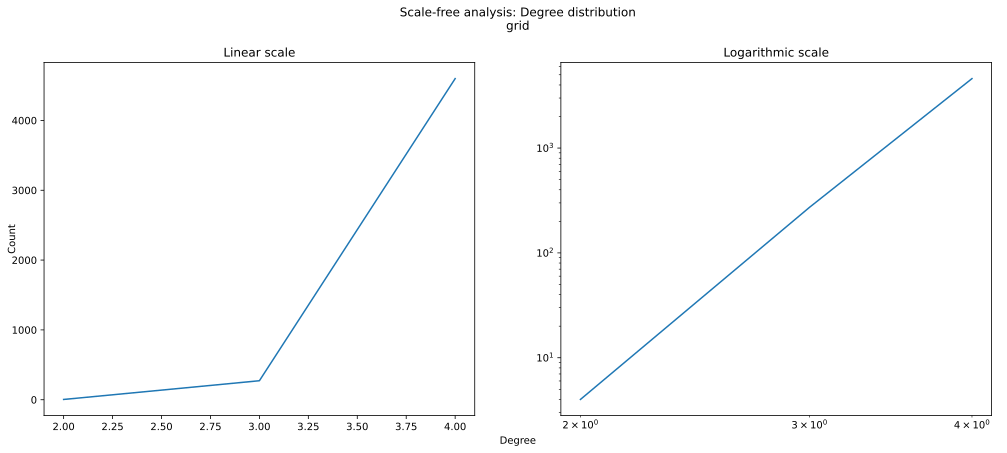

grid: scale free ((False, 1.4847728905552264))


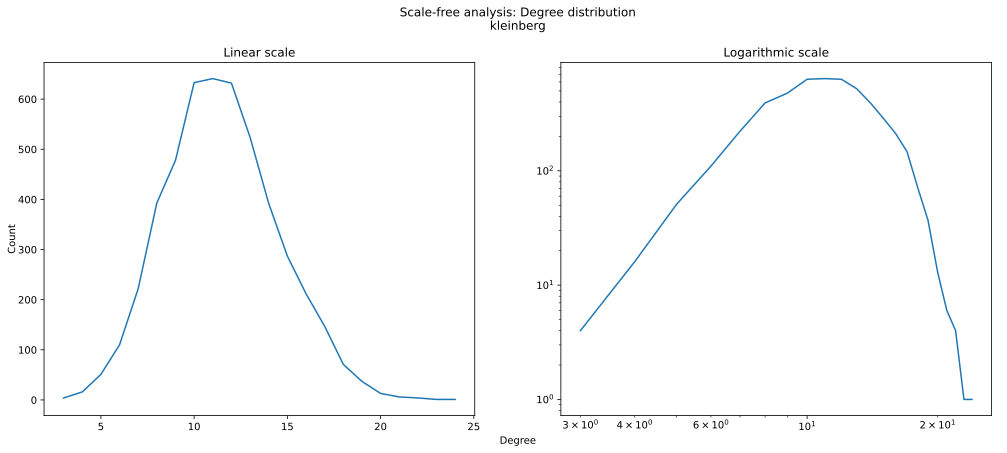

kleinberg: scale free ((False, 1.3228593942894884))


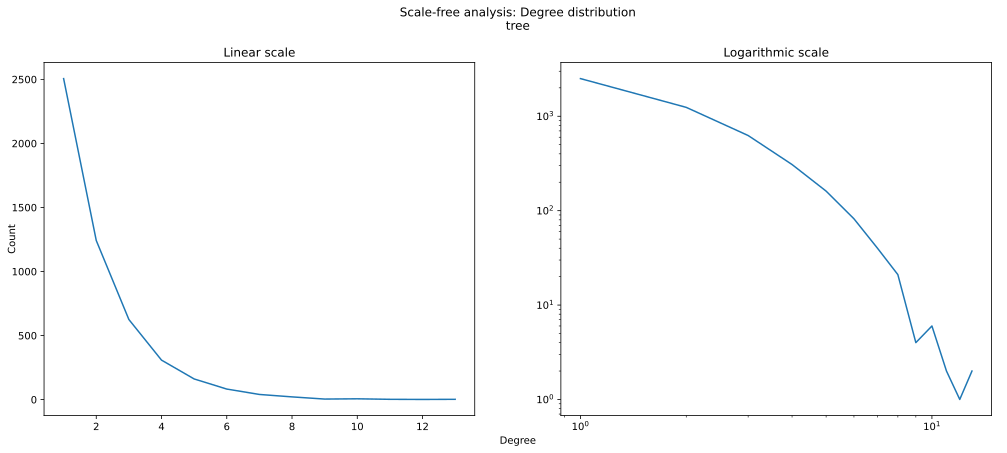

tree: scale free ((False, 1.8329446940843255))


Values less than or equal to 0 in data. Throwing out 0 or negative values


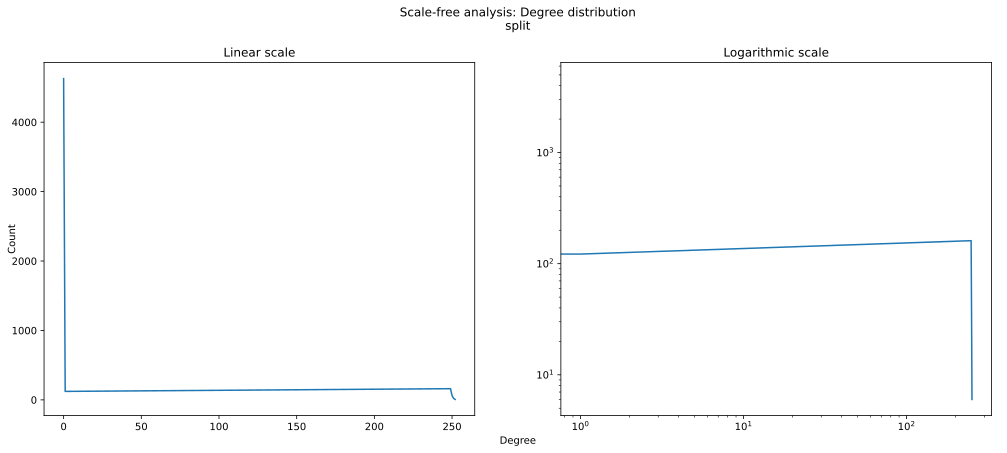

split: scale free ((False, 1.2271475060132442))


In [6]:
from analysis import scale_free_classification


res = scale_free_classification(real_graphs['fb_graph'], 'Facebook Graph')
print(f'Facebook Graph: scale free ({res})')
res = scale_free_classification(real_graphs['collaboration_network'], 'Collaboration Network')
print(f'Collaboration Network: scale free ({res})')

for name, graph in synthetic_graphs.items():
    res = scale_free_classification(graph=graph, name=name)
    print(f'{name}: scale free ({res})')

### Diameter classification
Compute the diameter of each graph studied, and classify those graphs according to the ratio diameter / log(n) (<= 1, 1 < . <= 10, > 10).

In [7]:
from analysis import diameter_classification
from prettytable import PrettyTable


results = PrettyTable(['Graph', 'd(G) / log(N) < 1', '1 < d(G) / log(N) <= 10', 'd(G) / log(N) > 10']) 

for name, graph in list(real_graphs.items()) + list(synthetic_graphs.items()):
    diameter_type = diameter_classification(graph=graph)
    row = [name, '', '', '']
    row[diameter_type + 1] = '✔'
    results.add_row(row)

print(results)

+-----------------------+-------------------+-------------------------+--------------------+
|         Graph         | d(G) / log(N) < 1 | 1 < d(G) / log(N) <= 10 | d(G) / log(N) > 10 |
+-----------------------+-------------------+-------------------------+--------------------+
|        fb_graph       |         ✔         |                         |                    |
| collaboration_network |                   |                         |         ✔          |
|         random        |                   |                         |         ✔          |
|          grid         |                   |                         |         ✔          |
|       kleinberg       |         ✔         |                         |                    |
|          tree         |                   |            ✔            |                    |
|         split         |                   |                         |         ✔          |
+-----------------------+-------------------+-------------------------

### Girth classification
Compute the girth of each graph studied, and classify those graphs according to thevalue obtained ( <= 4 vs. > 4).

In [8]:
from analysis import girth_classification


results = PrettyTable(['Graph', 'g(G) <= 4', 'g(G)  > 4']) 

for name, graph in list(real_graphs.items()) + list(synthetic_graphs.items()):
    girth_type = girth_classification(graph=graph)
    row = [name, '', '']
    row[girth_type + 1] = '✔'
    results.add_row(row)

print(results)

+-----------------------+-----------+-----------+
|         Graph         | g(G) <= 4 | g(G)  > 4 |
+-----------------------+-----------+-----------+
|        fb_graph       |     ✔     |           |
| collaboration_network |     ✔     |           |
|         random        |     ✔     |           |
|          grid         |     ✔     |           |
|       kleinberg       |     ✔     |           |
|          tree         |           |     ✔     |
|         split         |     ✔     |           |
+-----------------------+-----------+-----------+


## Advanced algorithms

Implement (and apply) an algorithm to count the number of triangles in a graph.

The clustering coefficient of a vertex is the ratio between the number of triangles in which it is containedand the maximum possible number of such triangles theoretically (if the degree is d(v), then this number is exactly d(v)*(d(v)-1)/2 ). Write (and apply) an algorithm to compute the clustering coefficients.

The average distance in a graph can be computed as follows: choose two vertices at random, compute their distance, repeat the operation a large number of times (say, 1000 times), then average the result. Classify the graphs studied depending on whether they are: ultra small world (average distance < loglog(n)), small-world (average distance < log(n)), or none of the twoprevious categories.

In [9]:
from advanced_algorithms import count_triangles, compute_average_distance
from prettytable import PrettyTable


results = PrettyTable(['Graph', 'N', 'log(N)', 'loglog(N)', '# Triangles', 'Average distance', 'Type']) 

for name, graph in list(real_graphs.items()) + list(synthetic_graphs.items()):
    N = len(graph.nodes)
    num_triangles, _ = count_triangles(graph=graph)
    average_distance, label = compute_average_distance(graph=graph)

    row = [name, N, f'{np.log(N):.2f}', f'{np.log(np.log(N)):.2f}', num_triangles, f'{average_distance:.2f}', label]

    results.add_row(row)

print(results)

+-----------------------+------+--------+-----------+-------------+------------------+-------------------+
|         Graph         |  N   | log(N) | loglog(N) | # Triangles | Average distance |        Type       |
+-----------------------+------+--------+-----------+-------------+------------------+-------------------+
|        fb_graph       | 4039 |  8.30  |    2.12   |   1612010   |       3.73       |    small world    |
| collaboration_network | 5242 |  8.56  |    2.15   |    386264   |       5.95       |    small world    |
|         random        | 5000 |  8.52  |    2.14   |      28     |       5.39       |    small world    |
|          grid         | 4875 |  8.49  |    2.14   |      0      |      47.06       |                   |
|       kleinberg       | 4875 |  8.49  |    2.14   |     3267    |       4.01       |    small world    |
|          tree         | 5000 |  8.52  |    2.14   |      0      |      15.00       |                   |
|         split         | 5000 |  8.5

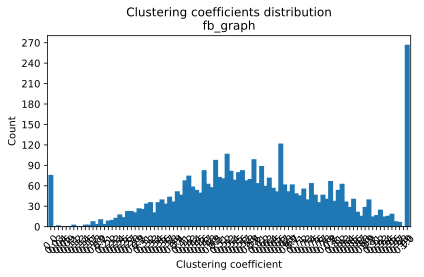

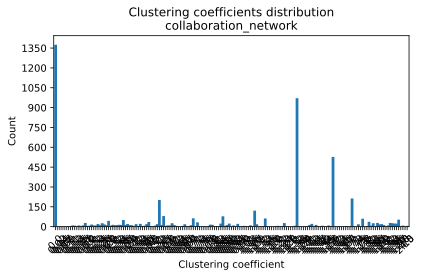

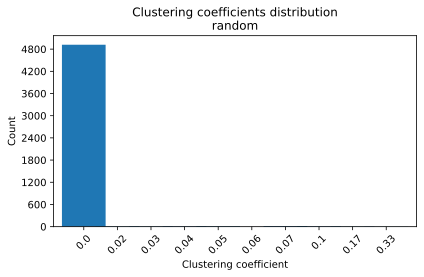

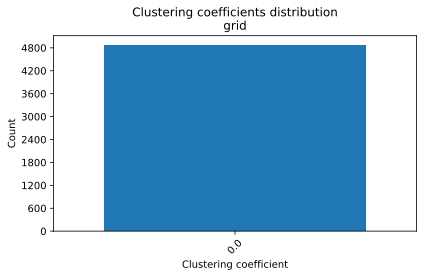

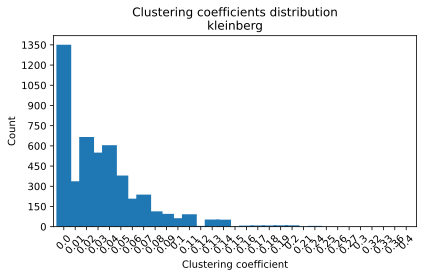

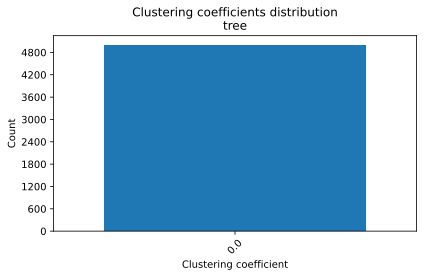

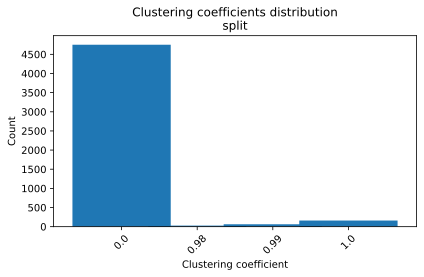

In [10]:
from advanced_algorithms import clustering_coefficients


for name, graph in list(real_graphs.items()) + list(synthetic_graphs.items()):
    diameter_type = clustering_coefficients(graph=graph, name=name)